# Plot all RSMD data

In [45]:
import os
import re
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
data_folder = "data/md_traj_analysis/"

In [47]:
files = glob.glob(data_folder+'*rmsd_C-alpha.xvg')

In [48]:
clean_line = lambda line: list(map(float, line.strip().split()))
exclude_regex = lambda line: not re.search("#|@",line)

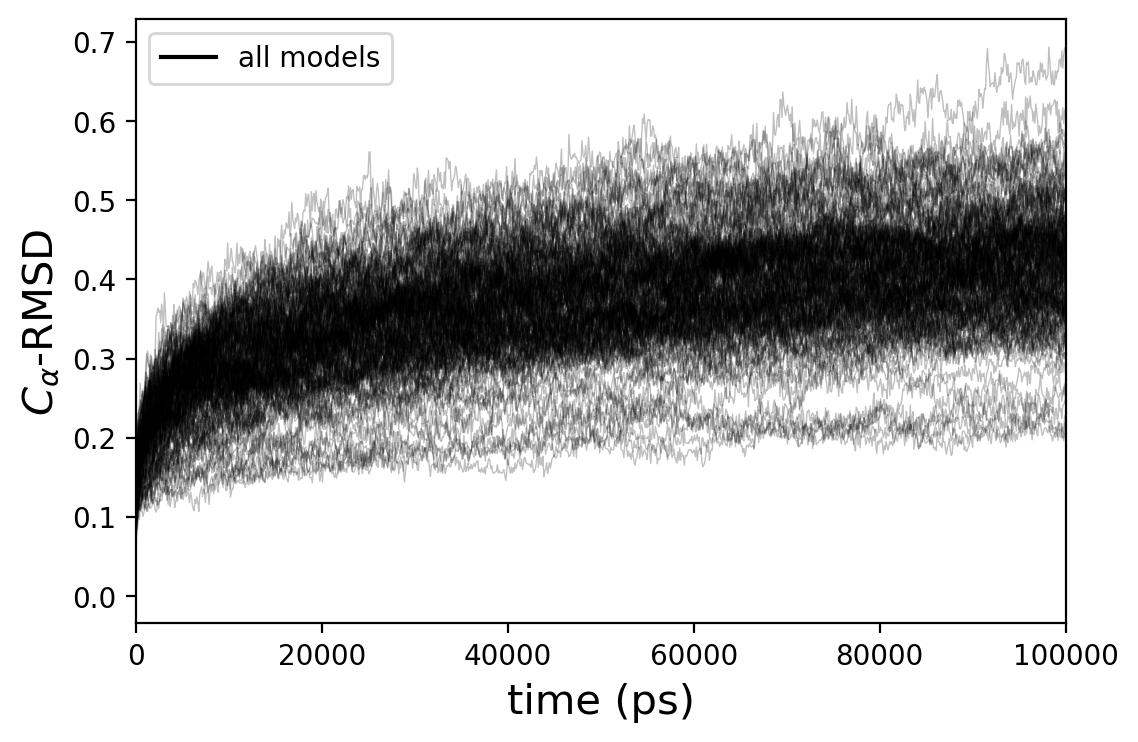

In [49]:
fig,ax = plt.subplots(1,1,dpi=200)

for path in files:
    data = [clean_line(l)  for l in open(path,'r').readlines() if exclude_regex(l)]
    data = np.array(data)
    
    ax.plot(*data.T,color="k",lw=0.5,alpha=0.25)

ax.plot([],[],color="k",label="all models")
    
ax.set_xlabel("time (ps)", fontsize=15)
ax.set_ylabel("$C_\\alpha$-RMSD", fontsize=15)

ax.set_xlim(0,100000)

ax.legend(loc="best",fontsize=10)
plt.show()

# Plot RMSD per mutant and conformation

In [50]:
data_folder = "data/md_traj_analysis/"

In [51]:
clean_line = lambda line: list(map(float, line.strip().split()))
exclude_regex = lambda line: not re.search("#|@",line)

In [52]:
mutant_names = ['cWza', 'cWza-K375C', 'cWza-S355C', 'cWza-Y373C']

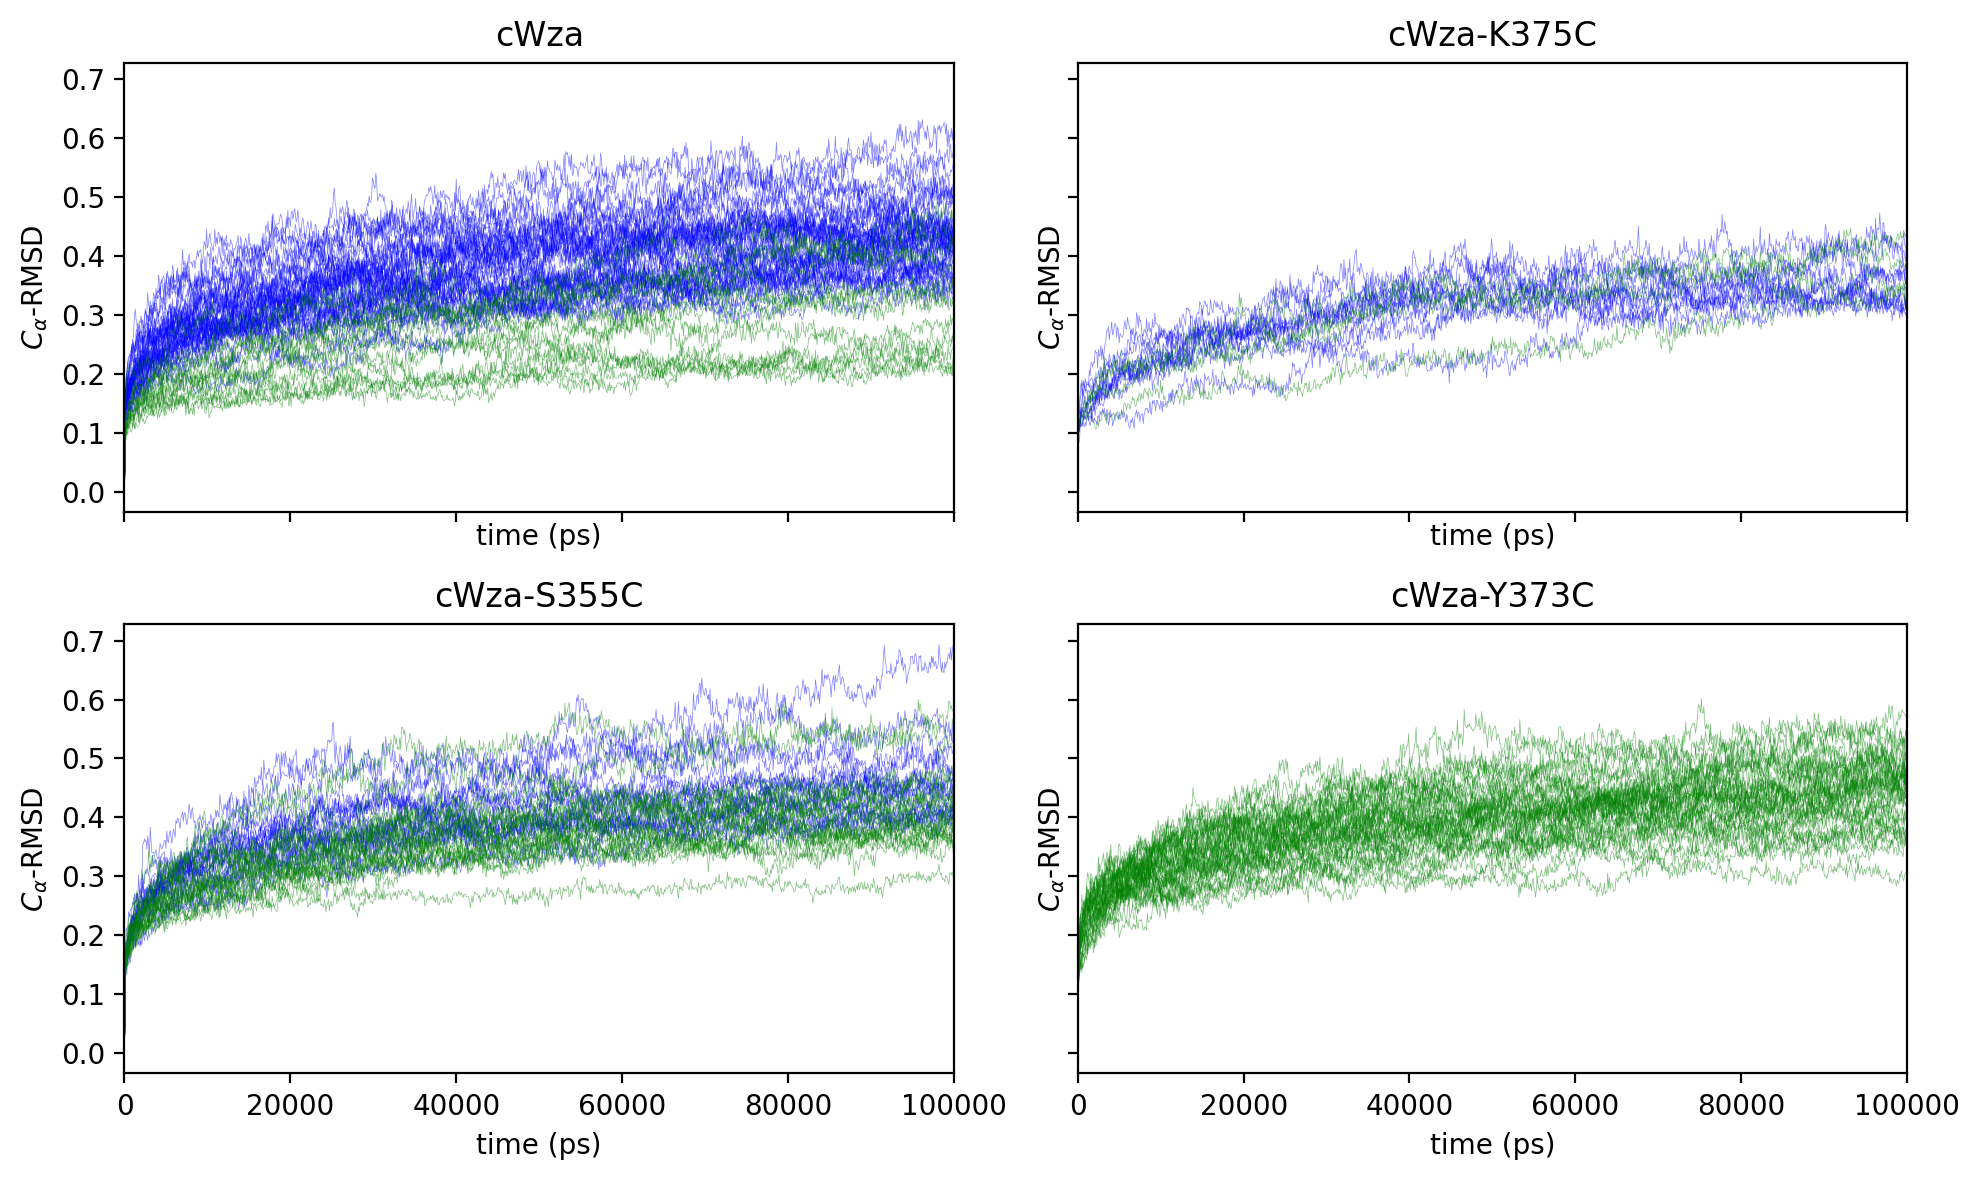

In [53]:
fig, ax = plt.subplots(2,2,figsize=(10,6),dpi=200, sharex=True, sharey=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

Colors = {0:"blue", 1:'green'}

for mutant in mutant_names:
    ax = Axes[mutant]
    for g in Conformations[mutant]: 
        files=glob.glob(data_folder+mutant+'_'+'conformation'+str(g)+'_'+'*rmsd_C-alpha.xvg')
        
        for path in files:
            data = [clean_line(l) for l in open(
                path, 'r').readlines() if exclude_regex(l)]
            data = np.array(data)

            ax.plot(*data.T, color=Colors[g], lw=0.25, alpha=0.5)

    ax.set_title(mutant)
    ax.set_xlabel("time (ps)", fontsize=10)
    ax.set_ylabel("$C_\\alpha$-RMSD", fontsize=10)

    ax.set_xlim(0, 100000)

fig.tight_layout()
plt.show()

# RMSD distributions: Last 10ns MD

In [54]:
data_folder = "data/md_traj_analysis/"

In [55]:
clean_line = lambda line: list(map(float, line.strip().split()))
exclude_regex = lambda line: not re.search("#|@",line)

In [56]:
mutant_names = ['cWza', 'cWza-K375C', 'cWza-S355C', 'cWza-Y373C']

## Distribution from RMSD trajectory data

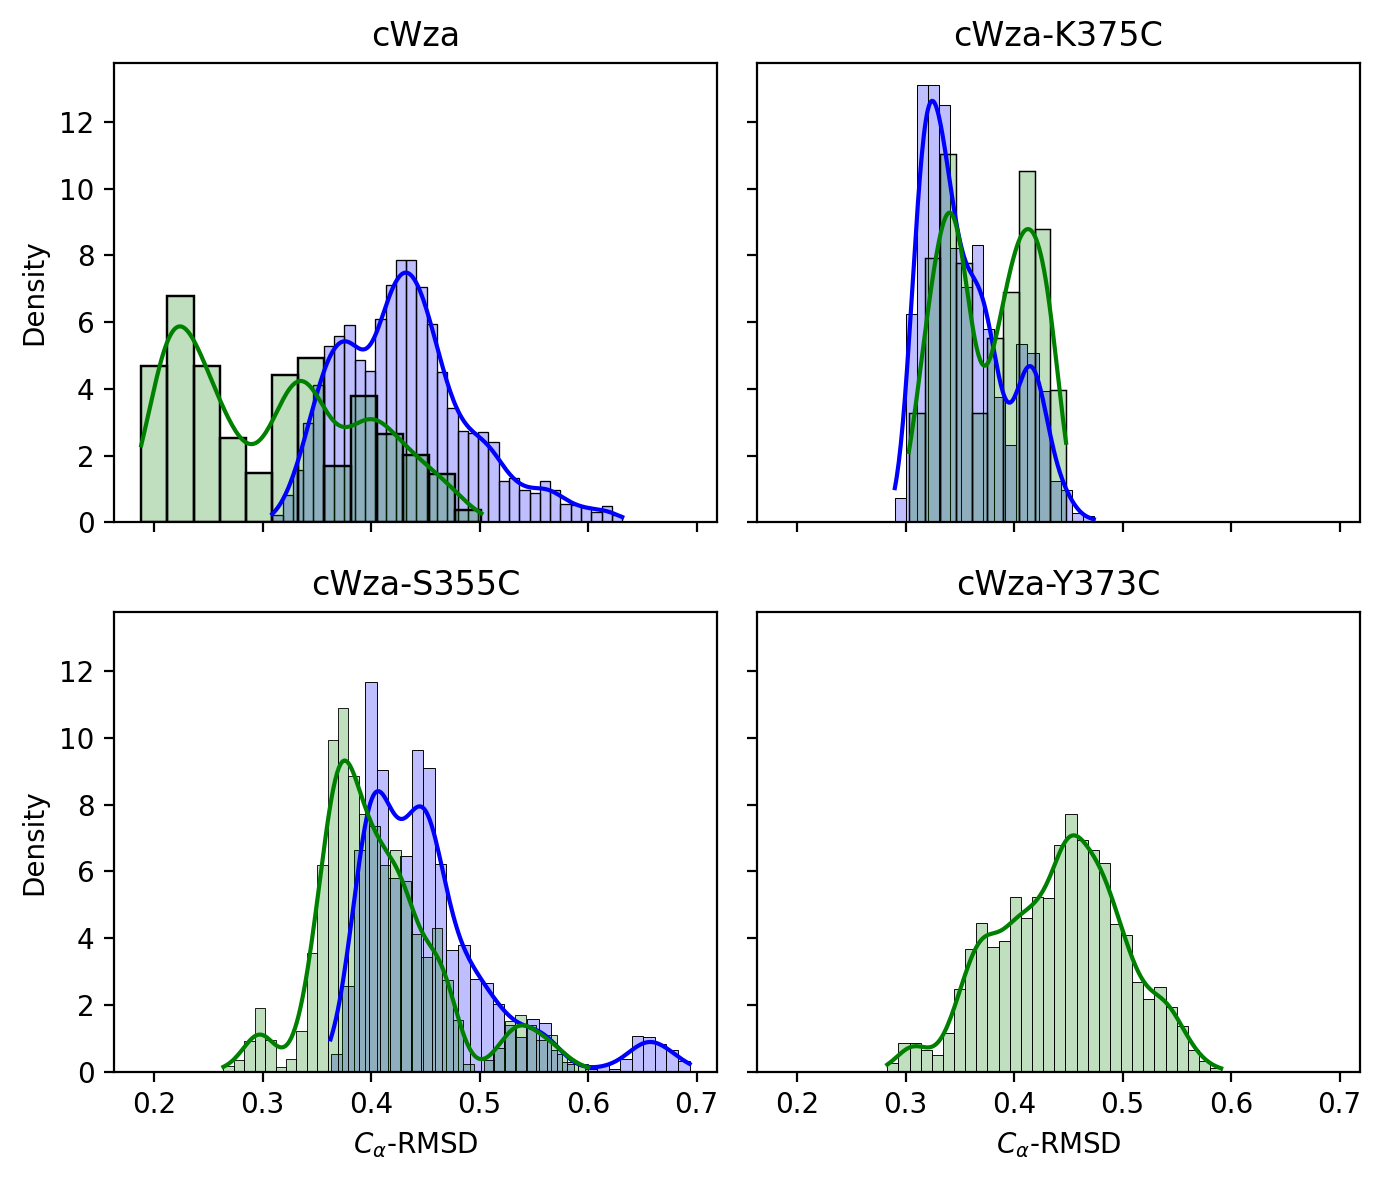

In [57]:
fig, ax = plt.subplots(2,2,figsize=(7,6),dpi=200, sharex=True, sharey=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

Colors = {0:"blue", 1:'green'}

time_threshold_ps = 90000 # picoseconds

for mutant in mutant_names:
    ax = Axes[mutant]
    
    for g in Conformations[mutant]:
        
        data_last_10ns = []
        
        files=glob.glob(data_folder+mutant+'_'+'conformation'+str(g)+'_'+'*rmsd_C-alpha.xvg')
        
        for path in files:
            data = [clean_line(l) for l in open(
                path, 'r').readlines() if exclude_regex(l)]
            data = np.array(data)
            
            time, value = data.T
            data_last_10ns = data_last_10ns + list(data[time > time_threshold_ps].T[-1])

        sns.histplot(data=data_last_10ns, stat="density", kde=True, color=Colors[g], alpha=0.25, ax=ax)

    ax.set_title(mutant)
    ax.set_xlabel("$C_\\alpha$-RMSD", fontsize=10)
    ax.set_ylabel("Density", fontsize=10)

fig.tight_layout()
plt.show()

## Distribution from mean RMSD trajectory data

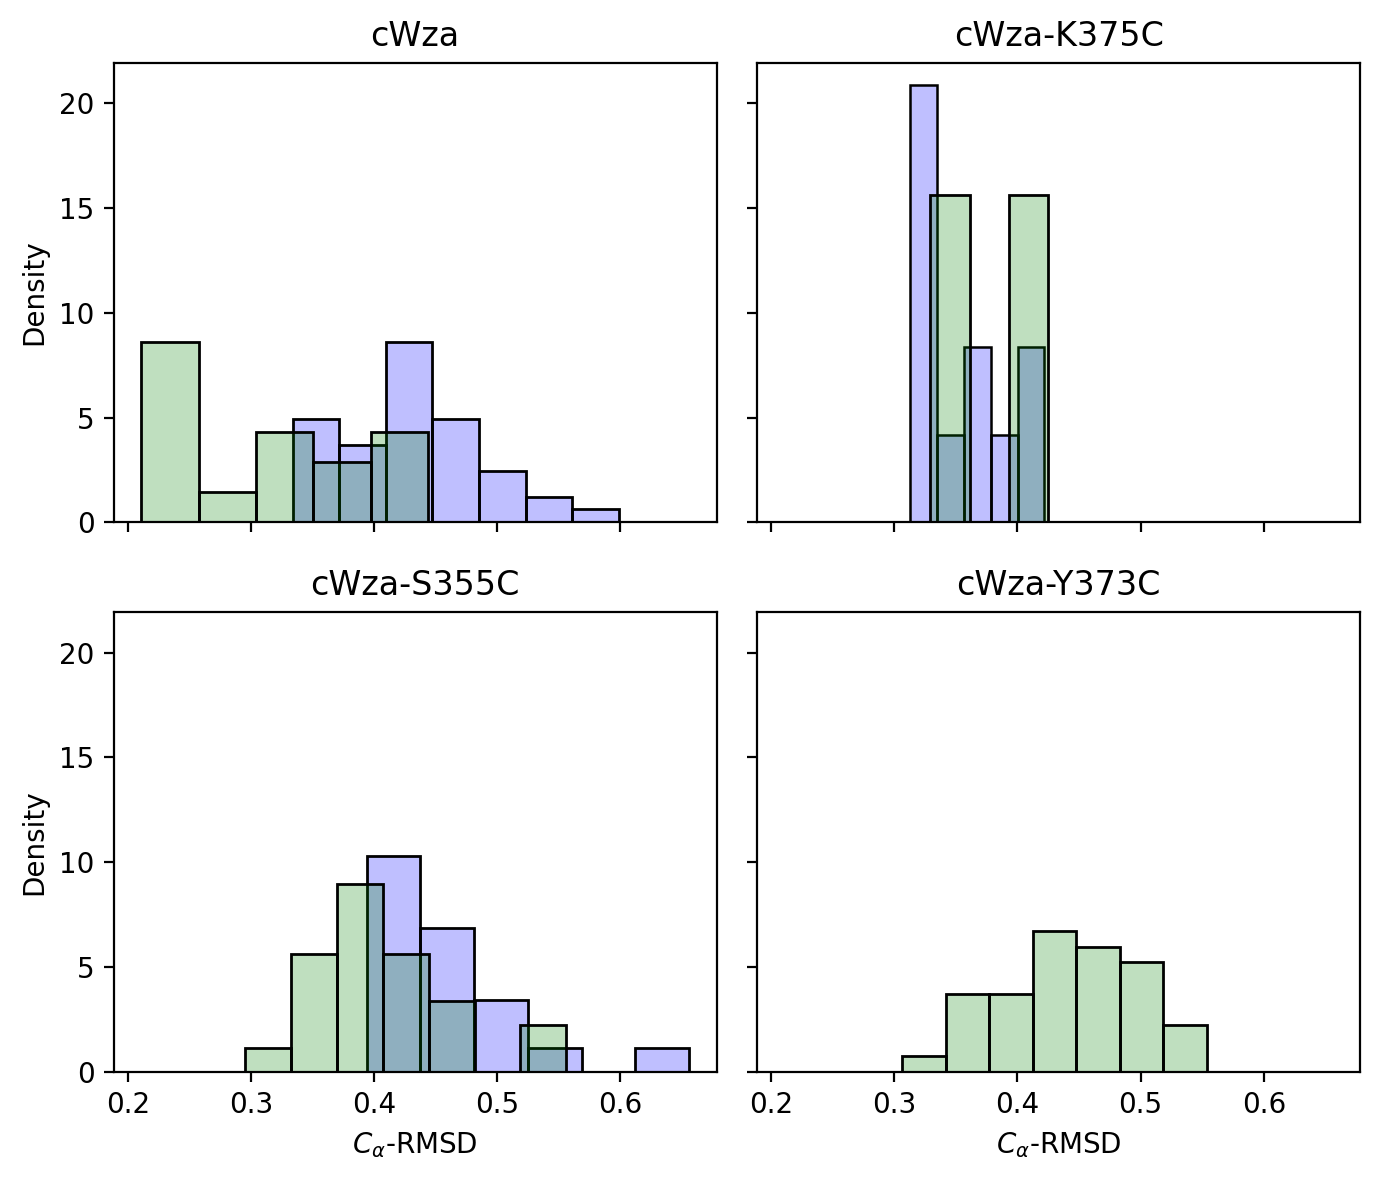

In [58]:
fig, ax = plt.subplots(2,2,figsize=(7,6),dpi=200, sharex=True, sharey=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

Colors = {0:"blue", 1:'green'}

time_threshold = 90000 # picosecs

for mutant in mutant_names:
    ax = Axes[mutant]
    
    for g in Conformations[mutant]:
        
        data_last_10ns = []
        
        files=glob.glob(data_folder+mutant+'_'+'conformation'+str(g)+'_'+'*rmsd_C-alpha.xvg')
        
        for path in files:
            data = [clean_line(l) for l in open(
                path, 'r').readlines() if exclude_regex(l)]
            data = np.array(data)
            
            time, value = data.T
            if len(data[time > 90000].T[-1]) > 0:
                data_last_10ns.append( np.mean(data[time > time_threshold].T[-1]) )
        
        sns.histplot(data=data_last_10ns, stat="density", color=Colors[g], alpha=0.25, ax=ax)

    ax.set_title(mutant)
    ax.set_xlabel("$C_\\alpha$-RMSD", fontsize=10)
    ax.set_ylabel("Density", fontsize=10)

fig.tight_layout()
plt.show()

## Rank models: Low-to-High Mean-RMSD (90-100ns)

In [59]:
TOP_LOWEST_RMSD_MODELS = {
    'cWza': {0:[], 1:[]},
    'cWza-K375C': {0:[], 1:[]},
    'cWza-S355C': {0:[], 1:[]},
    'cWza-Y373C': {1:[]}    
}

In [60]:
N_models = 10

In [61]:
Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

datafile_suffix = '_md_100ns_rmsd_C-alpha.xvg'

time_threshold = 90000 # pico-secs
for mutant in mutant_names:
    TOP_LOWEST_RMSD_MODELS[mutant] = {}
    
    for group in Conformations[mutant]:
        data_output = []
        
        files=glob.glob(data_folder+mutant+'_'+'conformation'+str(group)+'_*'+datafile_suffix)
        
        for path in files:
            data = [clean_line(l) for l in open(
                path, 'r').readlines() if exclude_regex(l)]
            data = np.array(data)
            
            time, value = data.T
            rmsd_data = data[time > time_threshold].T[-1]
            model_labels = path.split('/')[-1].split(datafile_suffix)[0]
            
            if len(rmsd_data) > 0: # check for empty dataset
                data_output.append([np.mean(rmsd_data), model_labels])
        
        #sort data by RMSD (low to high)        
        TOP_LOWEST_RMSD_MODELS[mutant][group] = sorted(data_output, key=lambda x: x[0])[:N_models]

Print out data

In [62]:
import pandas as pd
pd.set_option("display.max_colwidth", None)
pd.set_option('display.colheader_justify', 'center')

In [63]:
model_lowest_rmsd = []
for mutant in mutant_names:
    for group in Conformations[mutant]:
        for item in TOP_LOWEST_RMSD_MODELS[mutant][group]:
            model_lowest_rmsd.append(item)
            
df = pd.DataFrame(model_lowest_rmsd, columns=['Mean RMSD (90-100ns)[nm]', 'Model tags'])
df.style.set_properties(**{'text-align': 'center'})

### Plot RMSD data

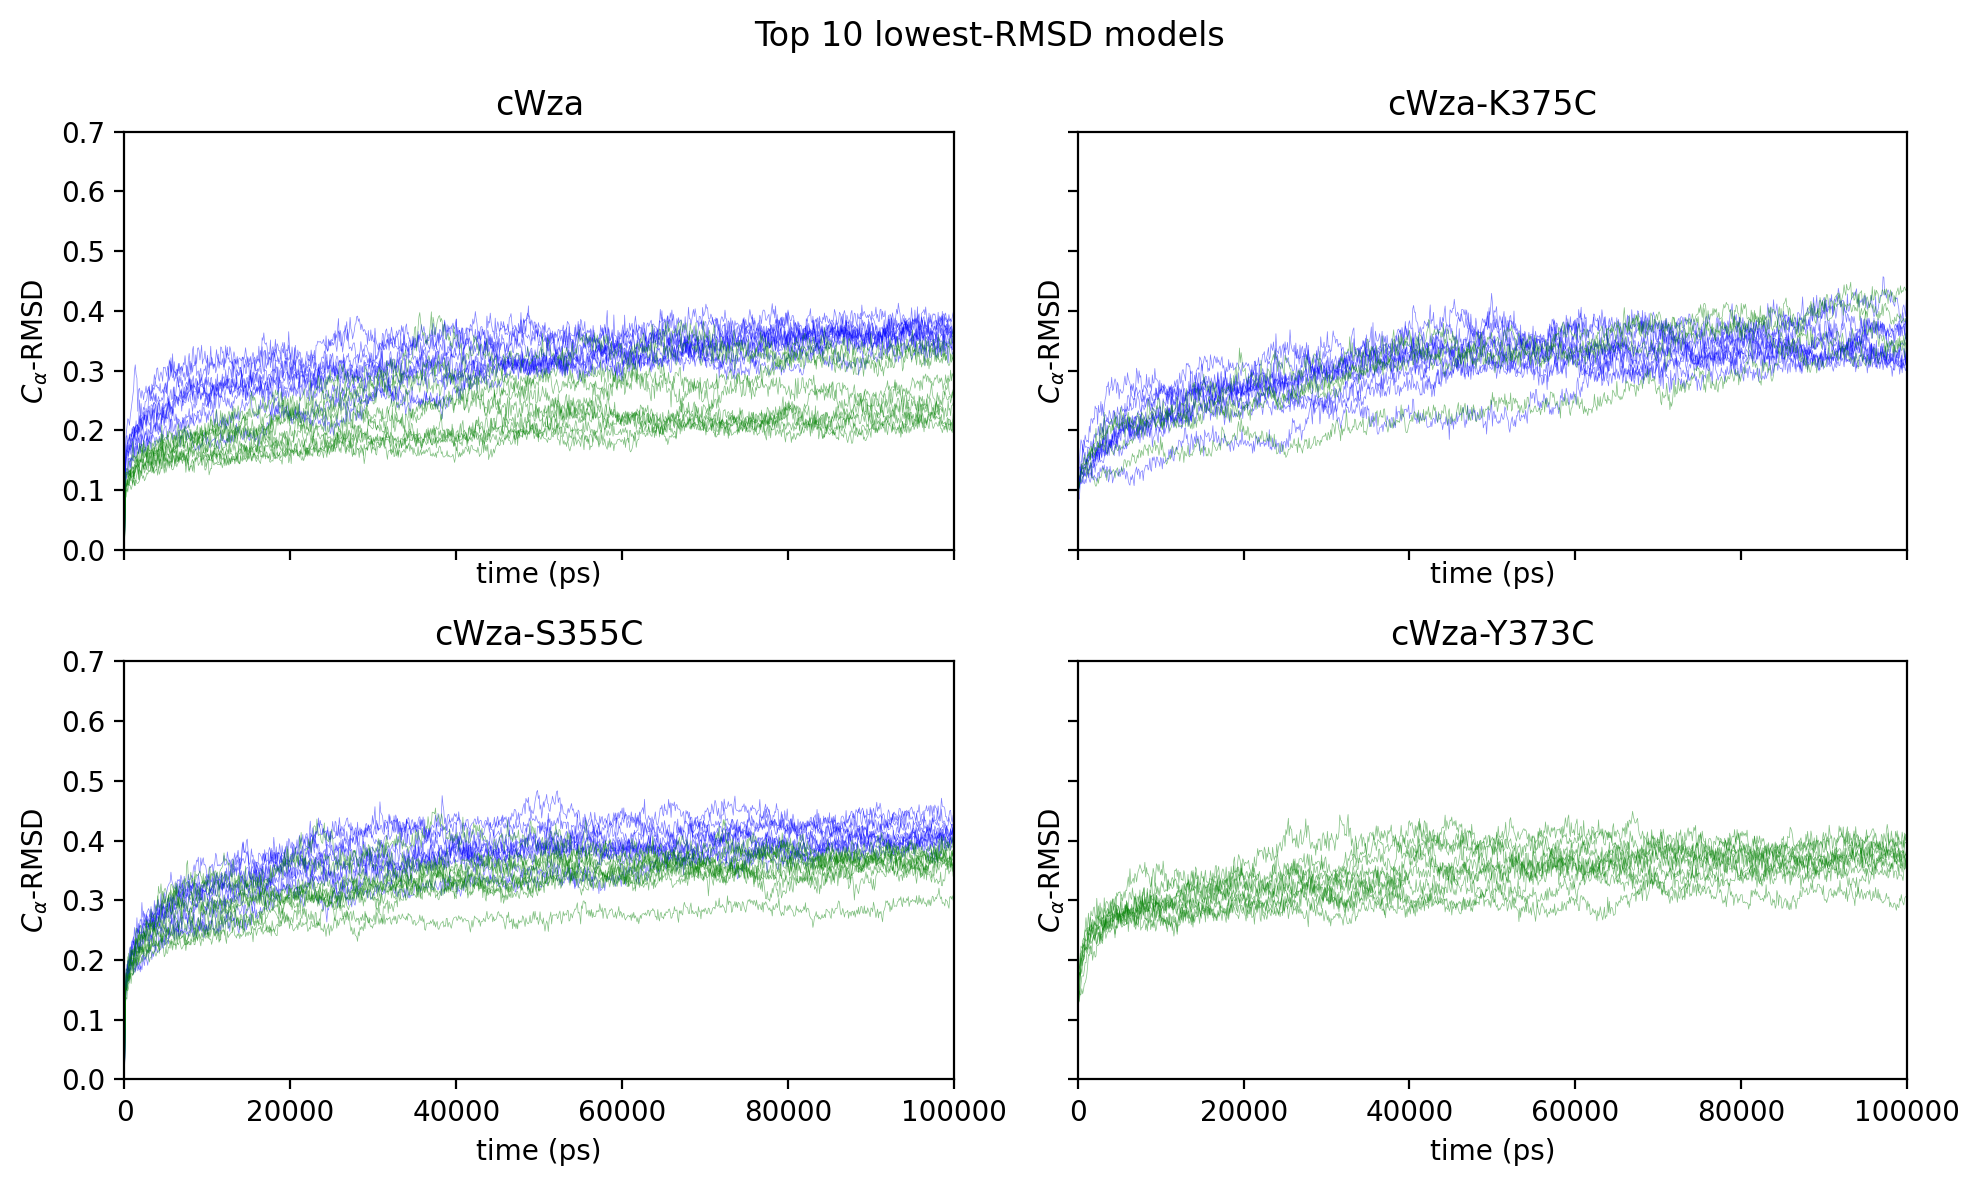

In [64]:
fig, ax = plt.subplots(2,2,figsize=(10,6),dpi=200, sharex=True, sharey=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

Colors = {0:"blue", 1:'green'}

datafile_suffix = '_md_100ns_rmsd_C-alpha.xvg'

for mutant in mutant_names:
    ax = Axes[mutant]
    
    for group in Conformations[mutant]:
        data_models = TOP_LOWEST_RMSD_MODELS[mutant][group]
        
        for i in range(len(data_models)):
            model_tags = data_models[i][-1]
            path = data_folder+model_tags+datafile_suffix
        
            rmsd_data = [clean_line(l) for l in open(
                path, 'r').readlines() if exclude_regex(l)]
            rmsd_data = np.array(rmsd_data)
            
            ax.plot(*rmsd_data.T, color=Colors[group], lw=0.25, alpha=0.5)

    ax.set_title(mutant)
    ax.set_xlabel("time (ps)", fontsize=10)
    ax.set_ylabel("$C_\\alpha$-RMSD", fontsize=10)

     
ax.set_xlim(0, 100000)
ax.set_ylim(0, 0.7)

suptitle = "Top "+str(N_models)+" lowest-RMSD models"
fig.suptitle(suptitle)

fig.tight_layout()
plt.show()

### Lowest-RMSD models

In [65]:
import pandas as pd
pd.set_option("display.max_colwidth", None)
pd.set_option('display.colheader_justify', 'center')

In [66]:
model_lowest_rmsd = []
for mutant in mutant_names:
    for group in Conformations[mutant]:
        model_lowest_rmsd.append(TOP_LOWEST_RMSD_MODELS[mutant][group][0])

df = pd.DataFrame(model_lowest_rmsd, columns=['Mean RMSD (90-100ns)[nm]', 'Model tags'])
df.style.set_properties(**{'text-align': 'center'})

Plot their RMSD

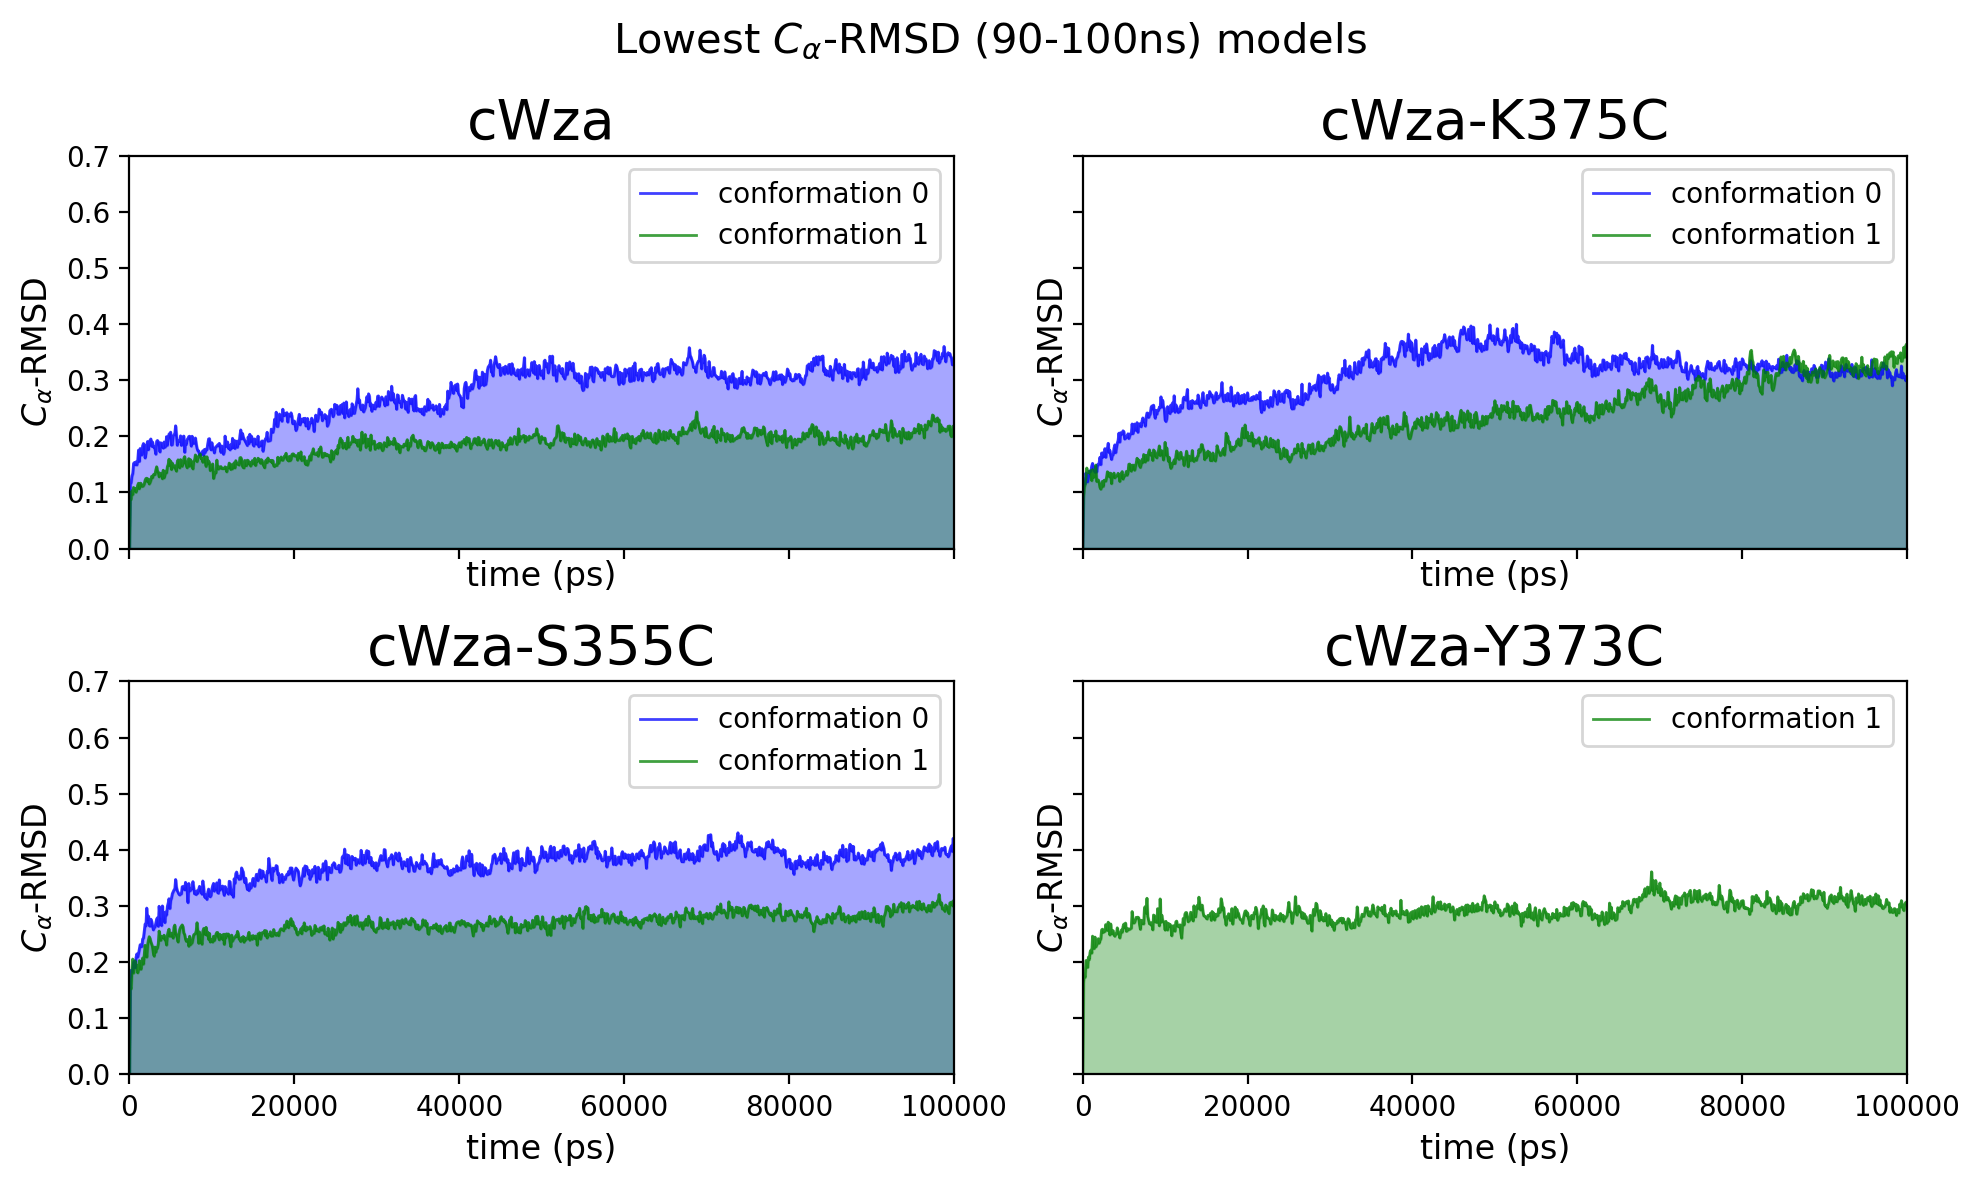

In [82]:
fig, ax = plt.subplots(2,2,figsize=(10,6),dpi=200, sharex=True, sharey=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

Colors = {0:"blue", 1:'green'}

datafile_suffix = '_md_100ns_rmsd_C-alpha.xvg'

for mutant in mutant_names:
    ax = Axes[mutant]
    for group in Conformations[mutant]:
        
        data_models = TOP_LOWEST_RMSD_MODELS[mutant][group]
        model_tags = data_models[0][-1] #data lowest-RMSD model
        path = data_folder+model_tags+datafile_suffix

        rmsd_data = [clean_line(l) for l in open(
            path, 'r').readlines() if exclude_regex(l)]
        rmsd_data = np.array(rmsd_data)
        
        zorder = -int(np.mean(rmsd_data.T[-1])*100)
        color = Colors[group]
        ax.fill_between(*rmsd_data.T, color=color, lw=1, alpha=0.35, zorder=zorder)
#         ax.plot(*rmsd_data.T, color=color, lw=1, label=model_tags, alpha=0.75)
        ax.plot(*rmsd_data.T, color=color, lw=1, label='conformation '+str(group), alpha=0.75)

# ax.set_title("Lowest-RMSD models")
# ax.set_xlabel("time (ps)", fontsize=15)
# ax.set_ylabel("$C_\\alpha$-RMSD", fontsize=15)
        ax.set_title(mutant,fontsize=20)
        ax.set_xlabel("time (ps)", fontsize=12)
        ax.set_ylabel("$C_\\alpha$-RMSD", fontsize=12)
        ax.set_xlim(0, 100000)
        ax.set_ylim(0, 0.7)
        ax.legend(loc="best")

fig.suptitle("Lowest $C_{\\alpha}$-RMSD (90-100ns) models",fontsize=15)
fig.tight_layout()
plt.show()

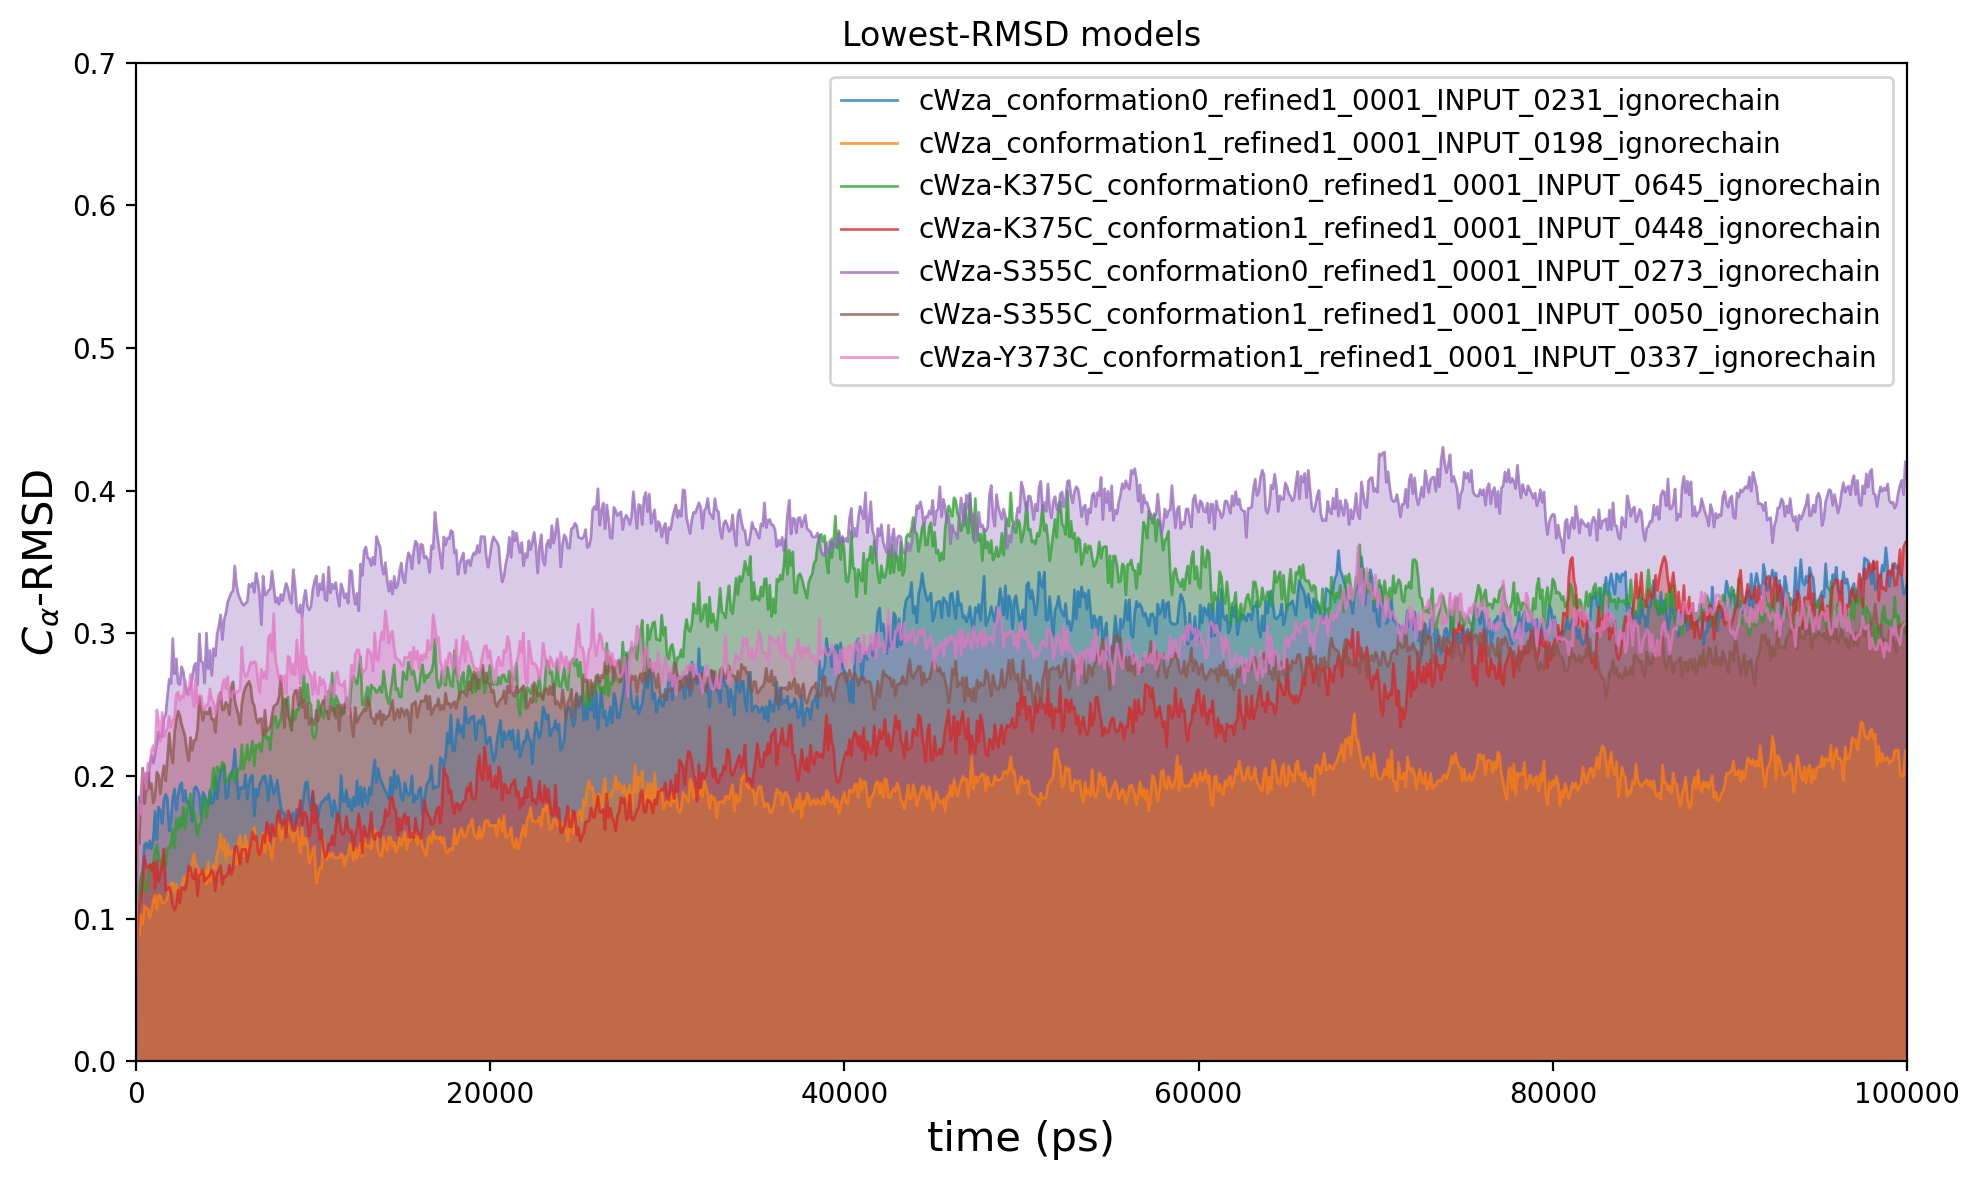

In [67]:
fig, ax = plt.subplots(1,1,figsize=(10,6),dpi=200)

datafile_suffix = '_md_100ns_rmsd_C-alpha.xvg'

for mutant in mutant_names:
    for group in Conformations[mutant]:
        
        data_models = TOP_LOWEST_RMSD_MODELS[mutant][group]
        model_tags = data_models[0][-1] #data lowest-RMSD model
        path = data_folder+model_tags+datafile_suffix

        rmsd_data = [clean_line(l) for l in open(
            path, 'r').readlines() if exclude_regex(l)]
        rmsd_data = np.array(rmsd_data)
        
        zorder = -int(np.mean(rmsd_data.T[-1])*100)
        ax.fill_between(*rmsd_data.T, lw=1, alpha=0.35, zorder=zorder)
        ax.plot(*rmsd_data.T, lw=1, label=model_tags, alpha=0.75)

ax.set_title("Lowest-RMSD models")
ax.set_xlabel("time (ps)", fontsize=15)
ax.set_ylabel("$C_\\alpha$-RMSD", fontsize=15)

ax.set_xlim(0, 100000)
ax.set_ylim(0, 0.7)

ax.legend(loc="best")

fig.tight_layout()
plt.show()

### Model comparisons

Slides featuring screenshots of the RMSD-selected models with respect to their original docking models and a model of wild-type Wza-D4 can be found [here](https://docs.google.com/presentation/d/1Ryon7fEflKvDhcPjxK3FlRhvZy-cCCIRbUz0G-e56RQ/edit?usp=sharing)

### Conductance calulations

In [3]:
models_paths = [
"cWza/conformation0/refined1_0001_INPUT_0231_ignorechain/",
"cWza/conformation1/refined1_0001_INPUT_0198_ignorechain/",
"cWza-K375C/conformation0/refined1_0001_INPUT_0645_ignorechain/",
"cWza-K375C/conformation1/refined1_0001_INPUT_0448_ignorechain/",
"cWza-S355C/conformation0/refined1_0001_INPUT_0273_ignorechain/",
"cWza-S355C/conformation1/refined1_0001_INPUT_0050_ignorechain/",
"cWza-Y373C/conformation1/refined1_0001_INPUT_0337_ignorechain/"
]

In [6]:
infile = "data/md_selected_models/HOLE_conductance_data_selected_models.txt"

Gmacro_data = []
data = []
for l in open(infile, 'r').readlines():
    if "&" not in l:
        G = l.split()[7] # Gpred Rmin
        #G = l.split()[5] # Gmacro
        data.append(0.001*float(G))
    else:
        next
        Gmacro_data.append(data)
        data = []

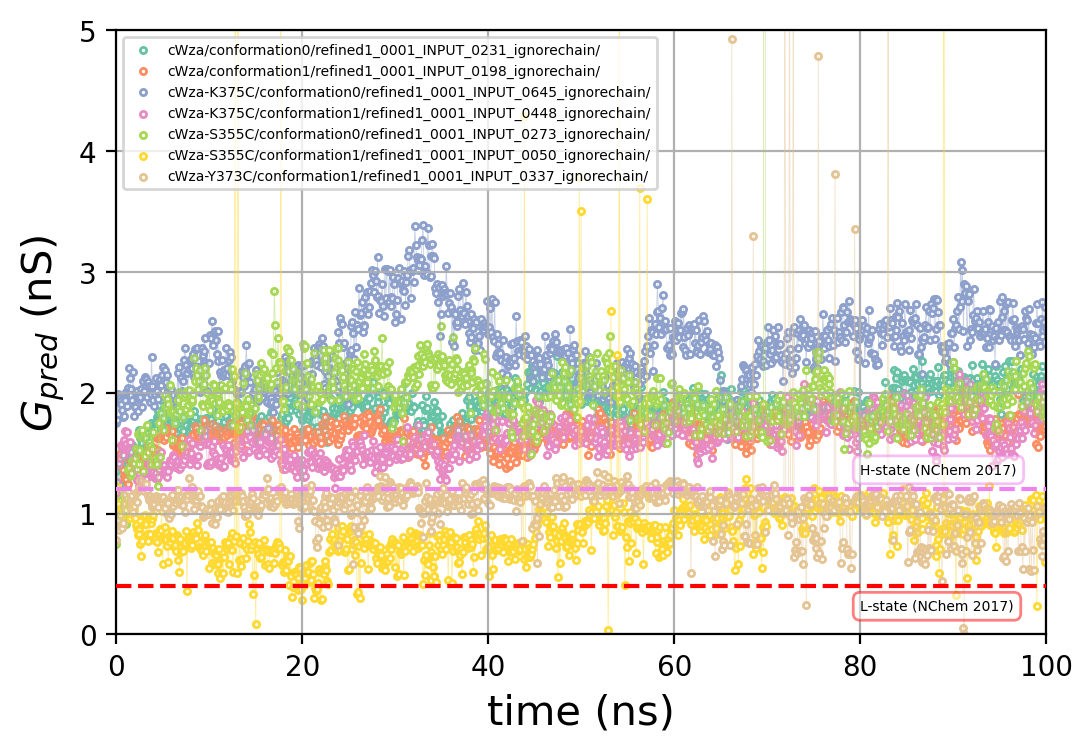

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure(dpi=200)
cm = mpl.cm.get_cmap('Set2')

t_initial = 0
t_final = 1000
n_frames = 1001
timeline = np.linspace(t_initial,t_final,n_frames)

for i in range(len(Gmacro_data)):
    dataset = np.array(Gmacro_data[i]).T
    label = models_paths[i]
    plt.plot(timeline,dataset,color=cm(i),lw=0.3, alpha=0.5)
    plt.scatter(timeline,dataset, s=5,color='white',edgecolor=cm(i),label=label,alpha=1)
    
# H-state cWza model (crystal structure)
Gpred_cWza_Hstate = [1.2]
plt.plot((0,100),2*Gpred_cWza_Hstate,lw=1.5,linestyle='--',color='violet',alpha=1,zorder=10)
plt.text(80,1.33,'H-state (NChem 2017)',rotation=0,fontsize=5,
        bbox=dict(facecolor='white',edgecolor='violet',alpha=0.5, boxstyle='round, pad=0.5'))

#L-state cWza model (CCBuilder and BUDE optimised)
Gpred_cWza_Lstate = [0.4]
plt.plot((0,100),2*Gpred_cWza_Lstate,lw=1.5,linestyle='--',color='red',alpha=1,zorder=10)
plt.text(80,0.2,'L-state (NChem 2017)',rotation=0,fontsize=5,
        bbox=dict(facecolor='white',edgecolor='red',alpha=0.5,boxstyle='round, pad=0.5'))
    
# customise plot
plt.legend(loc='best', fontsize=5)
plt.xlabel("time (ns)", fontsize=15)
plt.ylabel("$G_{pred}$ (nS)", fontsize=15)
plt.xlim(0,100)
plt.ylim(0,5)
plt.grid(True)

plt.show()

Code lines for protein frame extraction and HOLE execution

* List of relative paths in `paths_list_protein_extraction.txt` to directories containing `.xtc` MD trajectory files

```bash
cWza/conformation0/refined1_0001_INPUT_0231_ignorechain/
cWza/conformation1/refined1_0001_INPUT_0198_ignorechain/
cWza-K375C/conformation0/refined1_0001_INPUT_0645_ignorechain/
cWza-K375C/conformation1/refined1_0001_INPUT_0448_ignorechain/
cWza-S355C/conformation0/refined1_0001_INPUT_0273_ignorechain/
cWza-S355C/conformation1/refined1_0001_INPUT_0050_ignorechain/
cWza-Y373C/conformation1/refined1_0001_INPUT_0337_ignorechain/
```

* `bash` commands for using frame extraction Python script to store PDB frames in folder `md_100ns`


```bash
for path in `cat paths_list_protein_extraction.txt`; do 
    python ~/mpmodeling/tools/protein_frame_extractor.py md_100ns $path; 
done
```

* Inside the directory storing the PDB frames `run_hole` for every PDB file with prefix `Protein`

```bash
(for n in `seq 900 1000`; do run_hole Protein_${n}.pdb ; done) &
```

# Plot RMSF per mutant and conformation

In [25]:
data_folder = "data/md_traj_analysis/"

In [26]:
clean_line = lambda line: list(map(float, line.strip().split()))
exclude_regex = lambda line: not re.search("#|@",line)

In [27]:
mutant_names = ['cWza', 'cWza-K375C', 'cWza-S355C', 'cWza-Y373C']

## Raw data

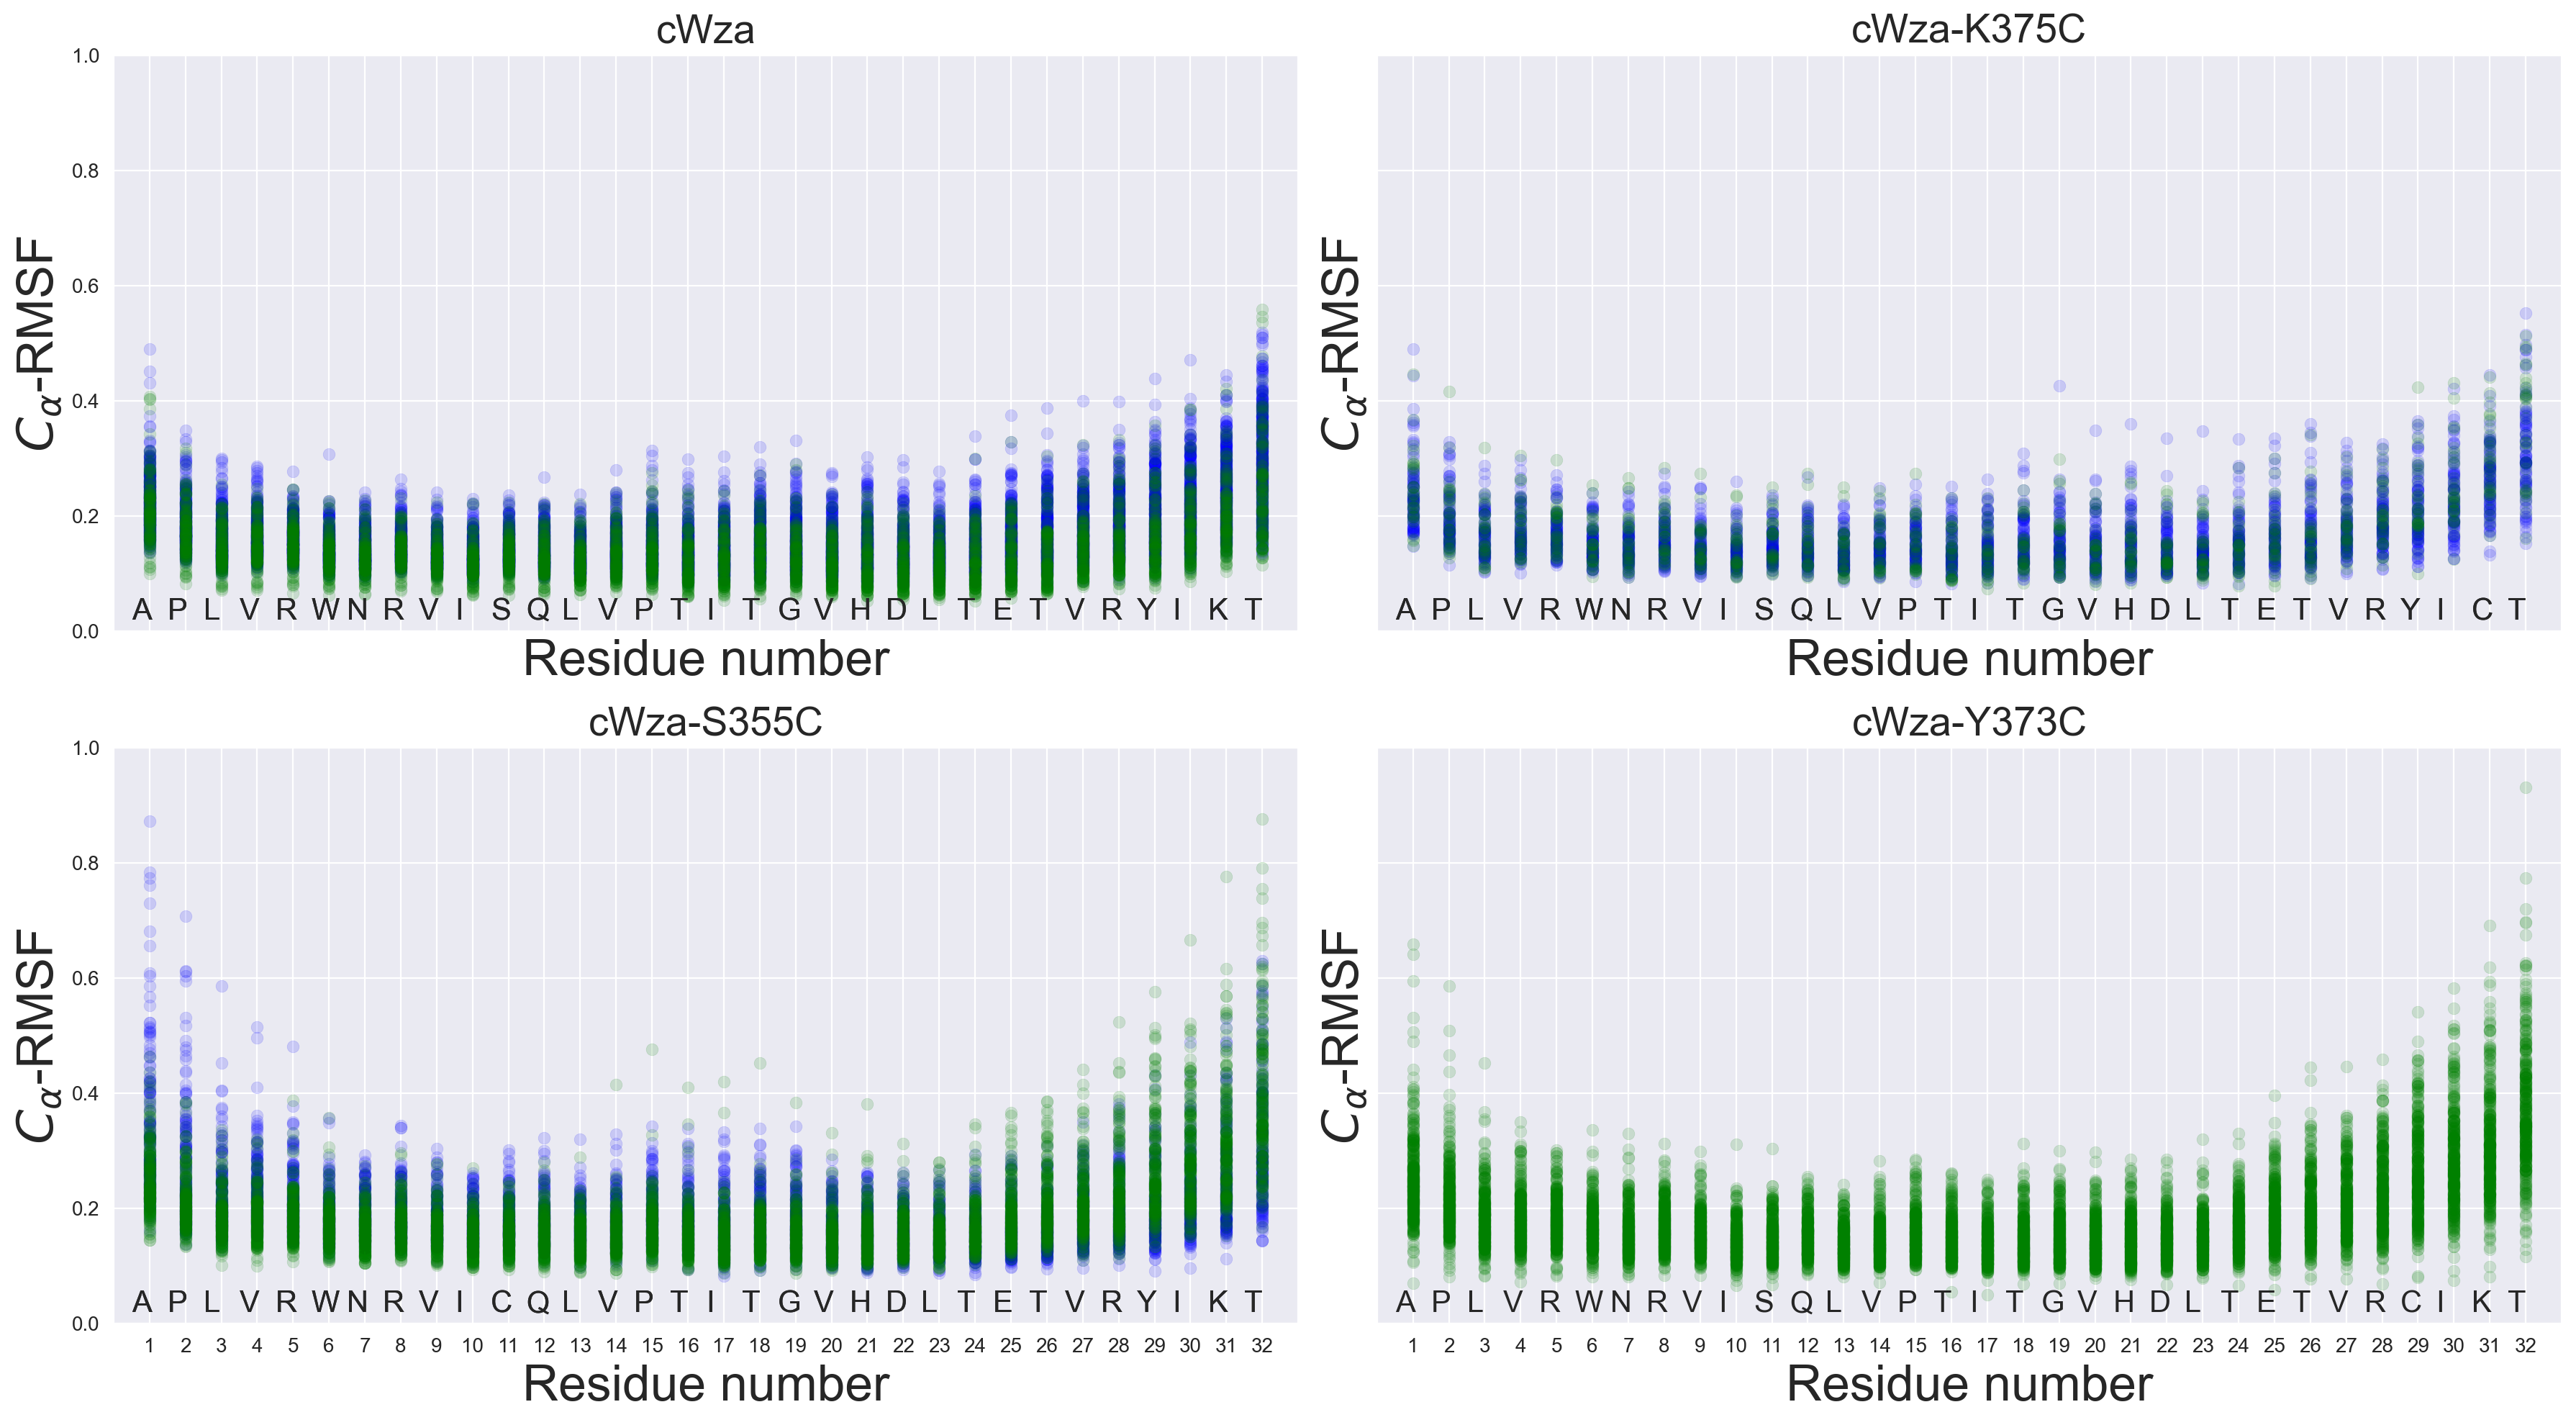

In [28]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(2,2,figsize=(18,10),dpi=200, sharex=True, sharey=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

Colors = {0:"blue", 1:'green'}

Sequences = {
    'cWza': 'APLVRWNRVISQLVPTITGVHDLTETVRYIKT',
    'cWza-K375C' : 'APLVRWNRVISQLVPTITGVHDLTETVRYICT',
    'cWza-S355C': 'APLVRWNRVICQLVPTITGVHDLTETVRYIKT',
    'cWza-Y373C': 'APLVRWNRVISQLVPTITGVHDLTETVRCIKT'
}

for mutant in mutant_names:
    ax = Axes[mutant]
    for g in Conformations[mutant]: 
        files=glob.glob(data_folder+mutant+'_'+'conformation'+str(g)+'_'+'*rmsf_C-alpha.xvg')
        
        for path in files:
            data = [clean_line(l) for l in open(
                path, 'r').readlines() if exclude_regex(l)]
            data = np.array(data)

            ax.scatter(*data.T, color=Colors[g], lw=0.25, alpha=0.15)

        ax.set_xticks(range(1,33))
        for resn in range(32):
            ax.text(resn+0.5, 0.02,Sequences[mutant][resn],fontsize=15)

    ax.set_title(mutant, fontsize=20)
    ax.set_xlabel("Residue number", fontsize=25)
    ax.set_ylabel("$C_\\alpha$-RMSF", fontsize=25)

ax.set_xlim(0, 33)
ax.set_ylim(0, 1)

fig.tight_layout()
plt.show()

## Averaged data

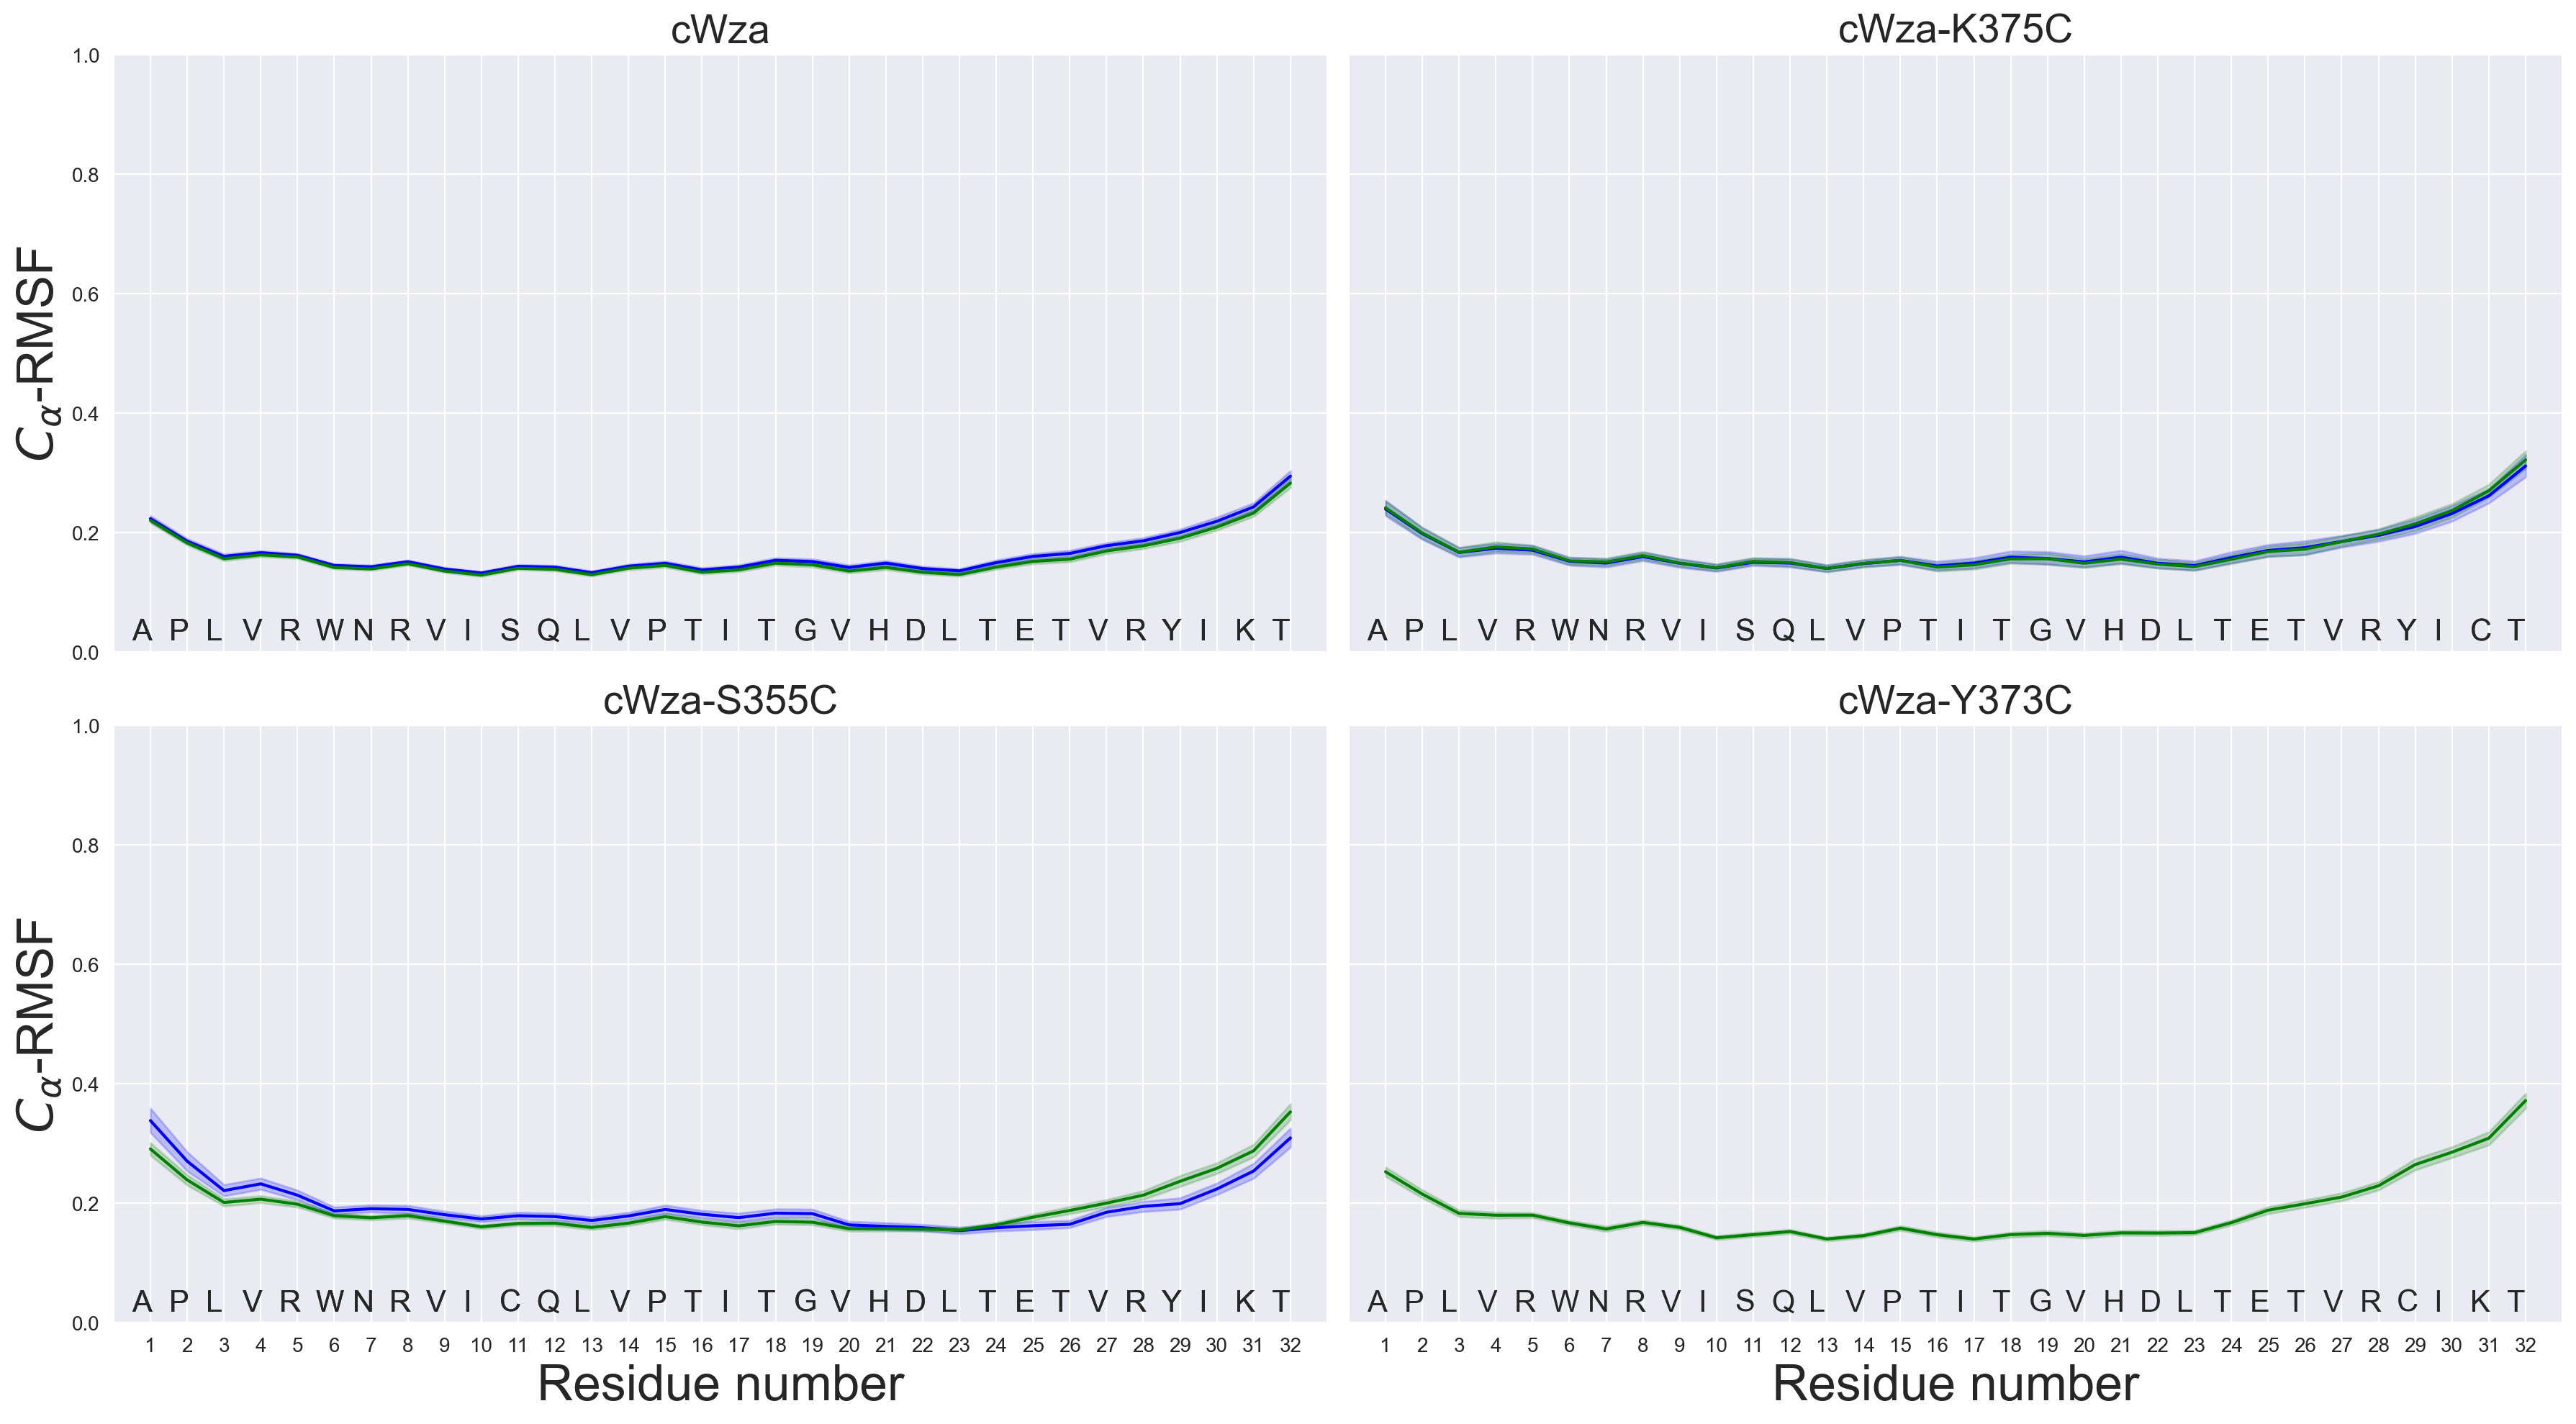

In [29]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(2,2,figsize=(18,10),dpi=200, sharex=True, sharey=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [1]    
}

Colors = {0:"blue", 1:'green'}

Sequences = {
    'cWza': 'APLVRWNRVISQLVPTITGVHDLTETVRYIKT',
    'cWza-K375C' : 'APLVRWNRVISQLVPTITGVHDLTETVRYICT',
    'cWza-S355C': 'APLVRWNRVICQLVPTITGVHDLTETVRYIKT',
    'cWza-Y373C': 'APLVRWNRVISQLVPTITGVHDLTETVRCIKT'
}

test_data = {}

for mutant in mutant_names:
    ax = Axes[mutant]
    test_data['residue'] = []
    test_data['rmsf'] = []
    
    for g in Conformations[mutant]: 
        files=glob.glob(data_folder+mutant+'_'+'conformation'+str(g)+'_'+'*rmsf_C-alpha.xvg')
        
        for path in files:
            data = [clean_line(l) for l in open(
                path, 'r').readlines() if exclude_regex(l)] 
            data = np.array(data).T
            X = data[0]; Y = data[1]
            test_data['residue'] = test_data['residue'] + list(X)
            test_data['rmsf'] = test_data['rmsf'] + list(Y)

        df = pd.DataFrame(test_data)
        sns.lineplot(x='residue',y='rmsf',data = df,color=Colors[g], ax=ax)
        ax.set_xticks(range(1,33))
        for resn in range(32):
            ax.text(resn+0.5, 0.02,Sequences[mutant][resn],fontsize=15)

    ax.set_title(mutant, fontsize=20)
    ax.set_xlabel("Residue number", fontsize=25)
    ax.set_ylabel("$C_\\alpha$-RMSF", fontsize=25)

ax.set_xlim(0, 33)
ax.set_ylim(0, 1)

fig.tight_layout()
plt.show()

In [67]:
import os
import sys
import json
import pandas
import seaborn
import operator
import concurrent.futures
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker

import matplotlib.pyplot as plt

In [128]:
from setup_db_metrics import Base, Tags, Pore_Dimensions, Radii_of_Gyration

In [77]:
dbfile = 'data/conf_metrics_Last10ns.db'

# Create engine and bind it to current session
engine = create_engine('sqlite:///'+dbfile)
Base.metadata.bind = engine
DBSession = sessionmaker(bind=engine)
session = DBSession()

In [78]:
TAGS = [
    ['cWza', 'conformation0'],
    ['cWza', 'conformation1'],
    ['cWza-K375C', 'conformation0'],
    ['cWza-K375C', 'conformation1'],
    ['cWza-S355C', 'conformation0'],
    ['cWza-S355C', 'conformation1'],
    ['cWza-Y373C', 'conformation1']
    ]

TAGS = [json.dumps(tag) for tag in TAGS]

In [114]:
DFS = {}
for tag in TAGS:
    mutant, conformation = json.loads(tag)
    models_ids = session.query(Tags.id).filter_by(mutant=mutant, group=conformation).all()
    models_ids = [x[0] for x in models_ids]
    print(len(models_ids))
    
    data = []
    for id in models_ids:
        try: 
            x = session.query(Pore_Dimensions.pore_length).filter_by(id=id)[0][0]        
            y = session.query(Pore_Dimensions.pore_Rmin).filter_by(id=id)[0][0]
            data.append([x,y])
        except:
            print("No data for id", id)
    

    DFS[tag] = pandas.DataFrame(data, columns=['length','Rmin'])

839
305
166
152
405
632
582


In [163]:
# models_ids = session.query(Tags.id).filter_by(mutant='cWza',frame='Protein_975').all()
pdb_name0 = 'refined1_0001_INPUT_0047_ignorechain'
models_ids = session.query(Tags.id).filter_by(mutant='cWza',group='conformation1', pdb_name=pdb_name0).all()
models_ids = [x[0] for x in models_ids]

print(len(models_ids))
testdata = []
for id in models_ids:
    x = session.query(Pore_Dimensions.pore_length).filter_by(id=id)[0][0]        
    y = session.query(Pore_Dimensions.pore_Rmin).filter_by(id=id)[0][0]
    group = session.query(Tags.group).filter_by(id=id)[0][0]
    pdb_name = session.query(Tags.pdb_name).filter_by(id=id)[0][0]
    mutant = session.query(Tags.mutant).filter_by(id=id)[0][0]
    frame = session.query(Tags.frame).filter_by(id=id)[0][0]
    testdata.append(frame)
    print(id,[x,y], group, mutant, frame, pdb_name == pdb_name0)

56
630 [39.1175, 8.13735] conformation1 cWza Protein_901 True
631 [39.008750000000006, 8.33563] conformation1 cWza Protein_905 True
632 [39.2975, 7.8274] conformation1 cWza Protein_906 True
633 [39.49125, 7.22182] conformation1 cWza Protein_913 True
634 [39.1775, 7.69792] conformation1 cWza Protein_902 True
635 [39.3875, 8.029] conformation1 cWza Protein_904 True
636 [39.0325, 7.82308] conformation1 cWza Protein_917 True
637 [39.254999999999995, 7.68256] conformation1 cWza Protein_908 True
638 [39.0875, 7.74078] conformation1 cWza Protein_910 True
639 [38.760000000000005, 7.24948] conformation1 cWza Protein_918 True
640 [39.06125, 7.97291] conformation1 cWza Protein_921 True
641 [38.58624999999999, 7.5526] conformation1 cWza Protein_930 True
642 [38.08, 7.67304] conformation1 cWza Protein_920 True
643 [38.338750000000005, 8.16492] conformation1 cWza Protein_923 True
644 [38.4775, 8.25895] conformation1 cWza Protein_925 True
645 [38.53875, 8.17393] conformation1 cWza Protein_929 True
64

In [165]:
testdata.sort()

In [167]:
len(testdata)

56

In [115]:
x = [
839,
305,
166,
152,
405,
632,
582]

In [116]:
sum(x)

3081

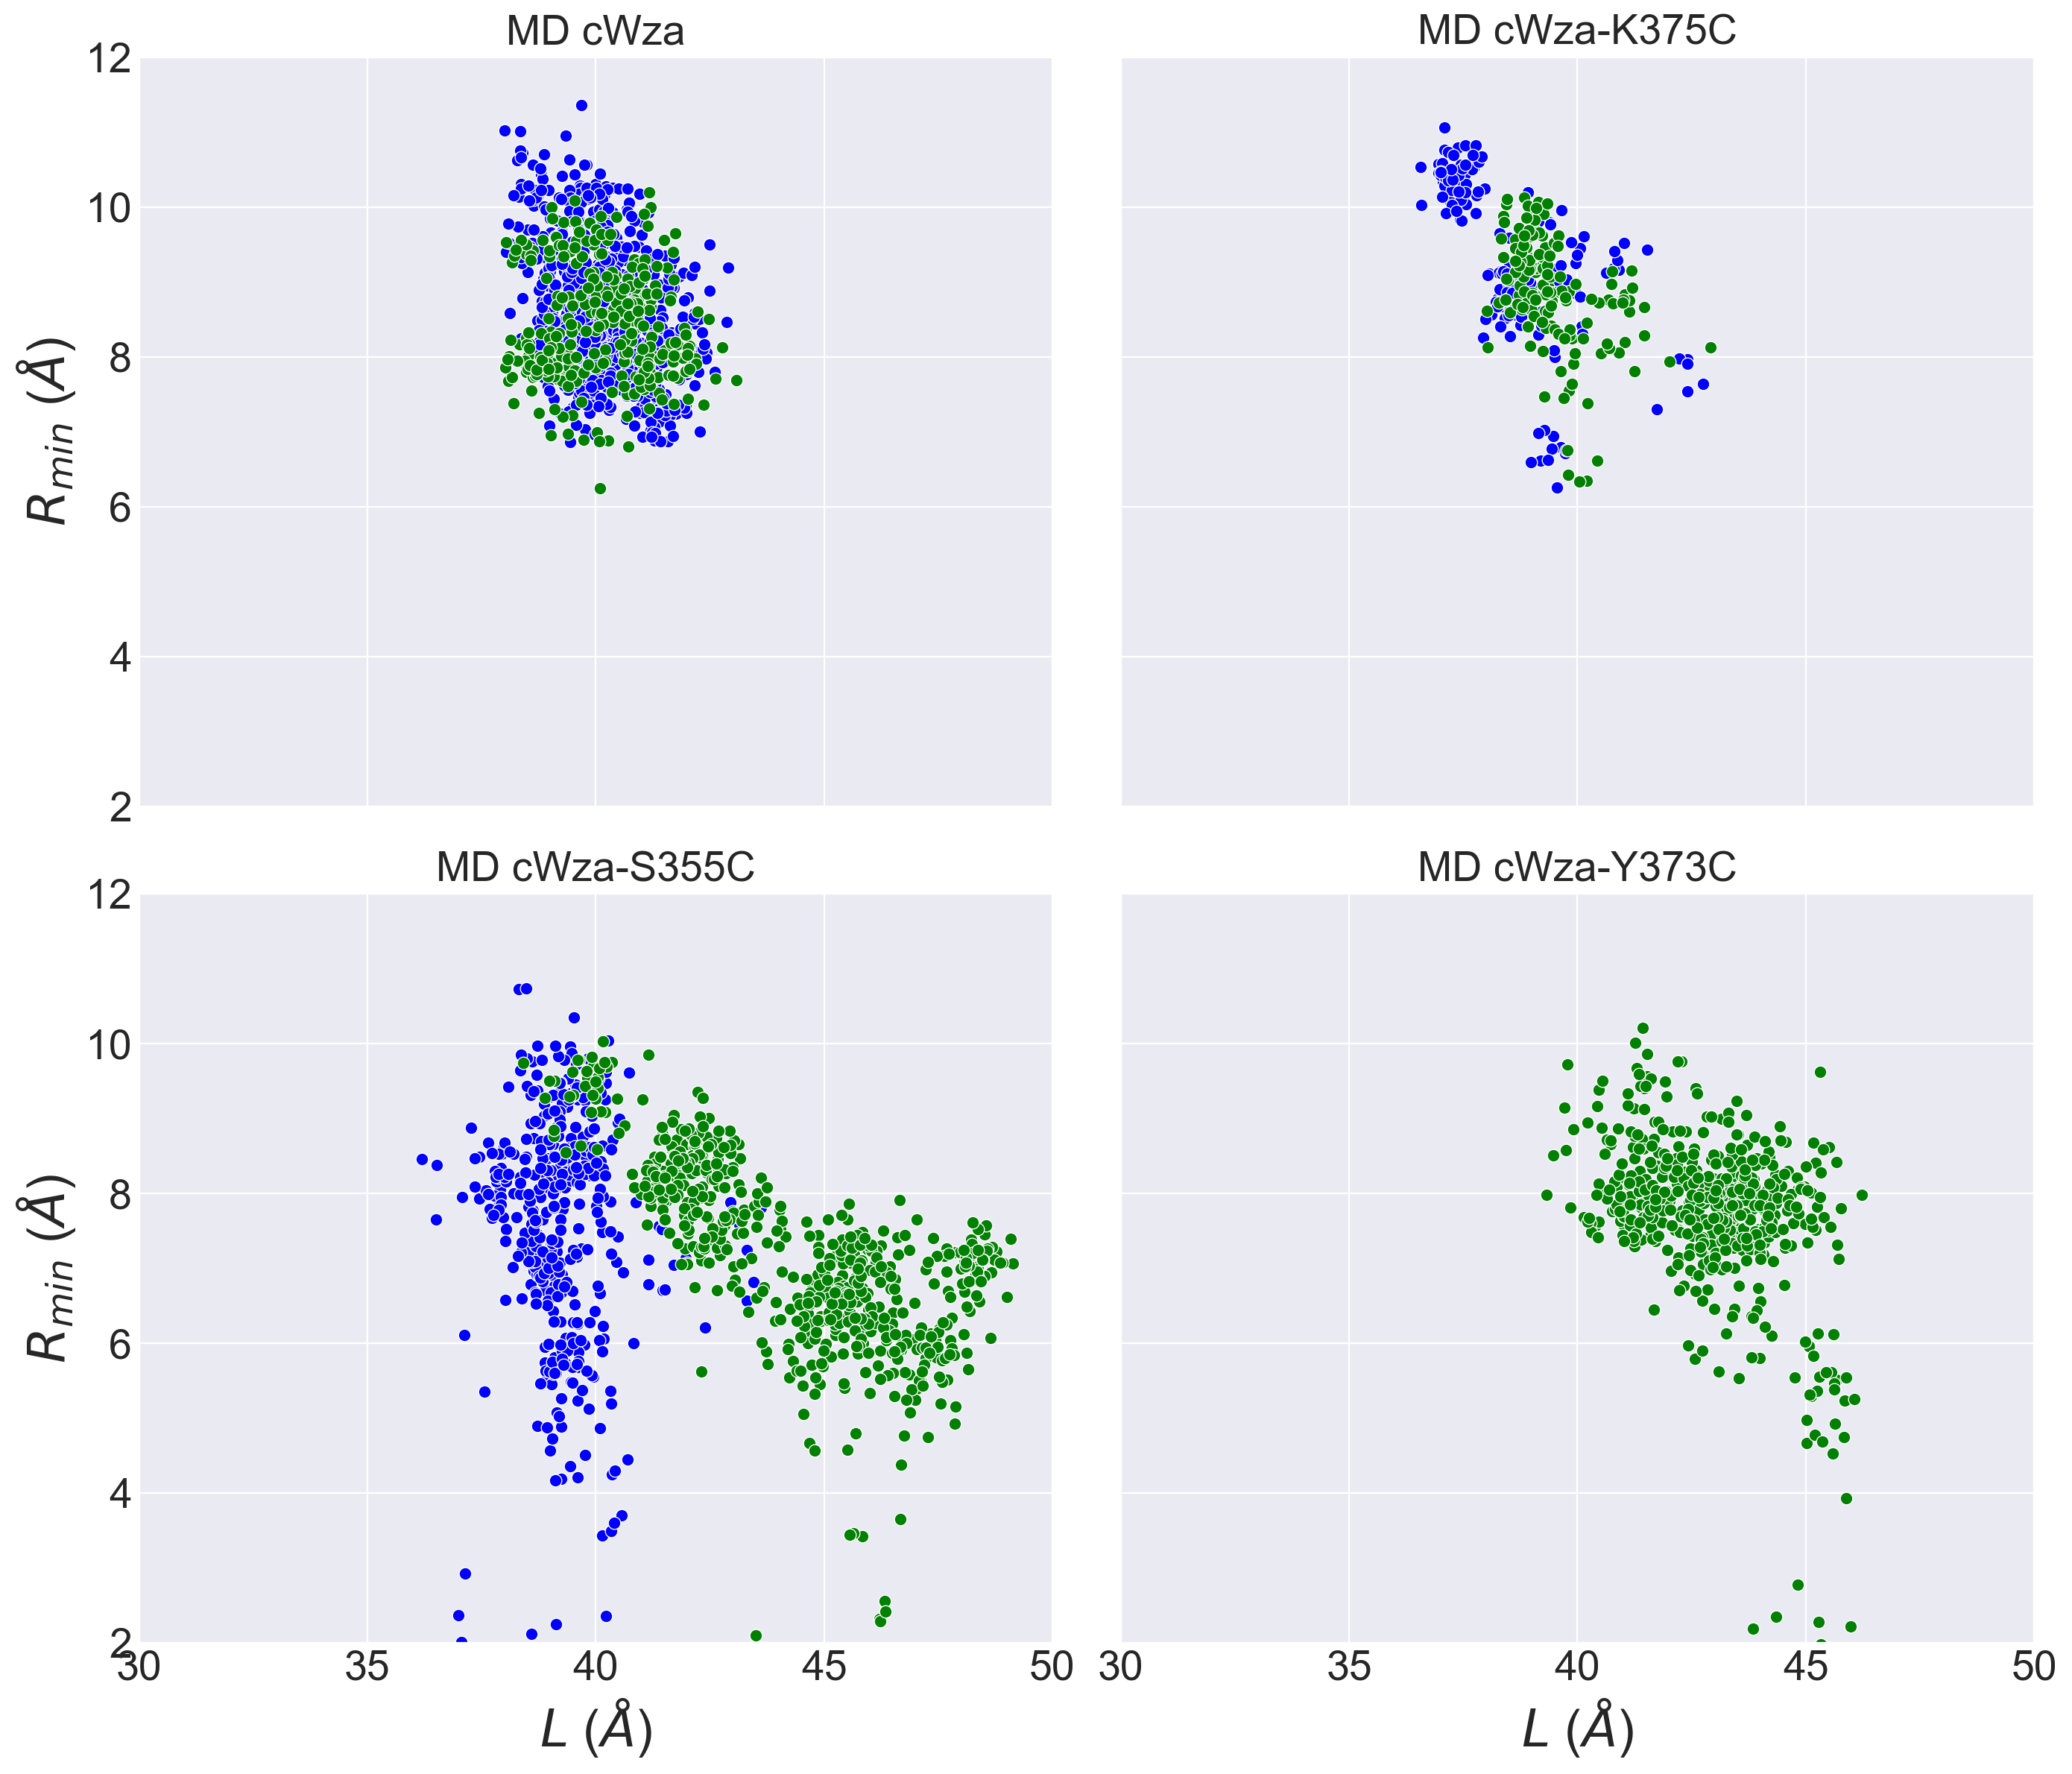

In [113]:
MUTANTS = ['cWza','cWza-K375C','cWza-S355C','cWza-Y373C']

CONFORMATIONS = {
    'cWza':['conformation0', 'conformation1'],
    'cWza-K375C':['conformation0', 'conformation1'],
    'cWza-S355C':['conformation0', 'conformation1'],
    'cWza-Y373C':['conformation1'],
}

fig, ax = plt.subplots(2,2,figsize=(14,12),sharex=True, sharey=True,dpi=200)
seaborn.set_style('darkgrid')

axes = {
    'cWza':ax[0,0],
    'cWza-K375C':ax[0,1],
    'cWza-S355C':ax[1,0],
    'cWza-Y373C':ax[1,1]
}

COLOURS = {
    'conformation0':'blue',
    'conformation1':'green'
}

for tag in TAGS:
    mutant,conformation = json.loads(tag)
    seaborn.scatterplot(
        x='length',
        y='Rmin',
        data=DFS[tag],
        color=COLOURS[conformation],
        ax=axes[mutant]
    )
    ###############################################                            
    # Customise plot
    ###############################################
    axes[mutant].set_title("MD "+mutant, fontsize=20)
    axes[mutant].tick_params(axis='both',direction='in',labelsize=20)
    axes[mutant].set_xlabel("$L$ ($\AA$)",fontsize=25)
    axes[mutant].set_ylabel("$R_{min}$ ($\AA$)",fontsize=25)
    axes[mutant].set_xlim(30,50)
    axes[mutant].set_ylim(2,12)

plt.tight_layout()
plt.show()

```
for n in `seq -f "%04g" 1 1000`; do line=$(grep "TAG" refined1_0001_INPUT_${n}_ignorechain.hole_dat); echo $n $line; done > cWza_hole_1-1000.raw_dat
```

# APPENDIX

Script to add chain numbers to protein PDBs extracted from `md_100ns.gro` files

```python
from pymol import cmd
import sys

pdb_in = sys.argv[1] # Input PDB path
pdb_out = sys.argv[2] # Output PDB path

cmd.load(pdb_in,"MyProtein")
N_atoms = cmd.count_atoms("MyProtein")

Chains = ['A', 'B','C','D','E','F','G','H']

atoms_per_chain = N_atoms/len(Chains)

for k in range(len(Chains)):
    atom_number_intial = int( 1 + k*atoms_per_chain )
    atom_number_final  = int( (k + 1)*atoms_per_chain )
    selection = "id "+ str(atom_number_intial) + ":" + str(atom_number_final)
    expression = "chain='"+Chains[k]+"'"
    cmd.alter(selection, expression)

cmd.set("retain_order",1)
cmd.save(pdb_out ,"MyProtein")
```

Commands to fix all chains in all models using a Python script

```bash
for pdb in `ls md_selected_models/*md_100ns.pdb`; do 
    pymol -qc ../add_chain_numbers.py -- $pdb ${pdb%.pdb}_FIXED-CHAINS.pdb; 
done
```

Simple Python script to overlay docking, MD, and wild-type Wza-D4 models

```python
from pymol import cmd
import sys

pdb1 = sys.argv[1] # PDB docking model
pdb2 = sys.argv[2] # PDB md_100ns model
wza_pdb = "data/md_selected_models/wzaD4-consensus-full.pdb"

cmd.load(pdb1,"docking")
cmd.load(pdb2,"md_100ns")
cmd.load(wza_pdb,"wza")

cmd.align("docking", "wza")
cmd.align("md_100ns", "wza")

cmd.hide("spheres","all")
cmd.show("cartoon","all")
cmd.show("sticks",'resname tyr+cys')
cmd.set("orthoscopic",1)
cmd.bg_color('white')
```